In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pymatreader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from pymatreader import read_mat
import cv2
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
from sklearn.model_selection import train_test_split

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/datasets/Brain Neoplasm(Tumor) Data/1512427.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/datasets/Brain Neoplasm(Tumor) Data')

In [ ]:
import os
os.makedirs('/content/drive/MyDrive/datasets/BRAIN TUMOR RESEARCH DATA')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/datasets/Brain Neoplasm(Tumor) Data/brainTumorDataPublic_1-766.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/datasets/BRAIN TUMOR RESEARCH DATA')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/datasets/Brain Neoplasm(Tumor) Data/brainTumorDataPublic_1533-2298.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/datasets/BRAIN TUMOR RESEARCH DATA')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/datasets/Brain Neoplasm(Tumor) Data/brainTumorDataPublic_2299-3064.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/datasets/BRAIN TUMOR RESEARCH DATA')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/datasets/Brain Neoplasm(Tumor) Data/brainTumorDataPublic_767-1532.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/datasets/BRAIN TUMOR RESEARCH DATA')

In [ ]:
len(os.listdir('/content/drive/MyDrive/datasets/BRAIN TUMOR RESEARCH DATA'))

3064

## DATA LOADING 

In [4]:
data = read_mat('/content/drive/MyDrive/datasets/BRAIN TUMOR RESEARCH DATA/1.mat')

In [5]:
data

{'cjdata': {'PID': '100360', 'image': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int16), 'label': 1.0, 'tumorBorder': array([267.61524501, 231.37568058, 277.83666062, 248.10163339,
         289.91651543, 250.8892922 , 305.71324864, 253.676951  ,
         318.72232305, 249.9600726 , 321.50998185, 237.88021779,
         354.96188748, 234.16333938, 367.97096189, 227.65880218,
         380.9800363 , 210.93284936, 372.61705989, 195.13611615,
         363.32486388, 177.48094374, 350.31578947, 176.55172414,
         336.37749546, 183.98548094, 317.79310345, 196.06533575,
         305.71324864, 207.21597096, 295.49183303, 217.43738657,
         288.98729583, 222.08348457, 273.19056261, 223.94192377,
         268.54446461, 228.58802178]), 'tumorMask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
 

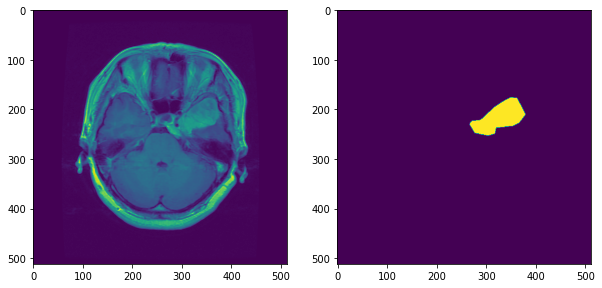

In [6]:
plt.rcParams['figure.figsize']=(10,5)
plt.subplot(1,2,1)
plt.imshow(data['cjdata']['image'])
plt.subplot(1,2,2)
plt.imshow(data['cjdata']['tumorMask'])
plt.show()

In [7]:
data['cjdata']['tumorBorder']

array([267.61524501, 231.37568058, 277.83666062, 248.10163339,
       289.91651543, 250.8892922 , 305.71324864, 253.676951  ,
       318.72232305, 249.9600726 , 321.50998185, 237.88021779,
       354.96188748, 234.16333938, 367.97096189, 227.65880218,
       380.9800363 , 210.93284936, 372.61705989, 195.13611615,
       363.32486388, 177.48094374, 350.31578947, 176.55172414,
       336.37749546, 183.98548094, 317.79310345, 196.06533575,
       305.71324864, 207.21597096, 295.49183303, 217.43738657,
       288.98729583, 222.08348457, 273.19056261, 223.94192377,
       268.54446461, 228.58802178])

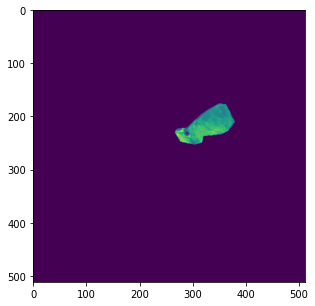

In [8]:
plt.imshow(data['cjdata']['image']*data['cjdata']['tumorMask'])

In [9]:
data['cjdata']['image'].shape

(512, 512)

In [14]:
m,g,p=[],[],[]
DATA=[]
for file in os.listdir('/content/drive/MyDrive/datasets/BRAIN TUMOR RESEARCH DATA'):
  data = read_mat(f'/content/drive/MyDrive/datasets/BRAIN TUMOR RESEARCH DATA/{file}')
  # Images.append(cv2.resize(data['cjdata']['image'],(256,256)))
  # Masks.append(cv2.resize(data['cjdata']['tumorMask'],(256,256)))
  # Borders.append(data['cjdata']['tumorBorder'])
  # Labels.append(data['cjdata']['label'])
  DATA.append([cv2.resize(data['cjdata']['image'],(128,128)),
              cv2.resize(data['cjdata']['tumorMask'],(128,128)),
              data['cjdata']['tumorBorder'],
              data['cjdata']['label']])
  print(int(data['cjdata']['label']))
  if int(data['cjdata']['label'])==1:
    m.append(cv2.resize(data['cjdata']['image'],(128,128)))
  if int(data['cjdata']['label'])==2:
    g.append(cv2.resize(data['cjdata']['image'],(128,128)))
  if int(data['cjdata']['label'])==3:
    p.append(cv2.resize(data['cjdata']['image'],(128,128)))

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [15]:
np.array(m).shape,np.array(g).shape,np.array(p).shape

((708, 128, 128), (1426, 128, 128), (930, 128, 128))

In [16]:
708+1426+930

3064

In [17]:
malig=np.array([ i for i in m]).reshape(708,128,128,1)
gilo=np.array([ i for i in g]).reshape(1426,128,128,1)
peutry=np.array([ i for i in p]).reshape(930,128,128,1)

All Tumor data store seperatly

In [19]:
import pickle
pickle.dump(malig,open('/content/drive/MyDrive/datasets/BRAIN_TUMOR_DATA_STORE/meningioma _Tumor_images.pkl','wb'))
pickle.dump(gilo,open('/content/drive/MyDrive/datasets/BRAIN_TUMOR_DATA_STORE/glioma_Tumor_images.pkl','wb'))
pickle.dump(peutry,open('/content/drive/MyDrive/datasets/BRAIN_TUMOR_DATA_STORE/pituitary_Tumor_images.pkl','wb'))

In [ ]:
Data=shuffle(DATA)

In [ ]:
Data=np.array(Data)
Images=Data[:,0]/255.0
Masks=Data[:,1]/1.0
Borders=Data[:,2]
Labels=Data[:,3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
Images.shape

(3064,)

In [ ]:
IMAGES=np.array([ i for i in Images]).reshape(3064,128,128,1)

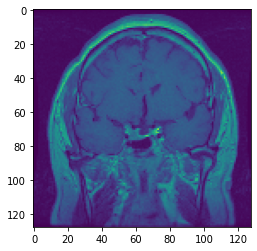

In [ ]:
plt.imshow(IMAGES[0].reshape(128,128))

In [ ]:
IMAGES.shape

(3064, 128, 128, 1)

In [ ]:
LABELS=np.array(Labels)
MASKS=np.array([ i for i in Masks]).reshape(3064,128,128,1)
BORDERS=np.array(Borders)

In [ ]:
x_train_images=IMAGES[:2800,]
x_test_images=IMAGES[2800:,]

x_train_labels=LABELS[:2800]
x_test_labels=LABELS[2800:]

x_train_masks=MASKS[:2800,]
x_test_masks=MASKS[2800:,]

x_train_borders=BORDERS[:2800]
x_test_borders=BORDERS[2800:]

In [ ]:
x_train_images.shape,x_train_masks.shape

((2800, 128, 128, 1), (2800, 128, 128, 1))

In [ ]:
x_train_labels

array([3.0, 3.0, 3.0, ..., 3.0, 1.0, 2.0], dtype=object)

1 for meningioma, 2 for glioma, 3 for pituitary tumor

In [ ]:
mapping={1:'meningioma Tumor',2:'glioma Tumor',3:'pituitary Tumor'}

In [ ]:
x_train_labels=pd.Series(x_train_labels).map(mapping)
x_test_labels=pd.Series(x_test_labels).map(mapping)

In [ ]:
X_TRAINING_LABELS=pd.DataFrame({'x_train':x_train_labels})
X_TESTING_LABELS=pd.DataFrame({'x_test':x_test_labels})

In [ ]:
enc=OneHotEncoder()
u=enc.fit_transform(np.array(X_TRAINING_LABELS).reshape(-1,1)).toarray()

In [ ]:
X_TRAINING_LABELS[[ i.split('_')[1] for i in enc.get_feature_names()]]=u
X_TRAINING_LABELS.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x_train,glioma Tumor,meningioma Tumor,pituitary Tumor
0,pituitary Tumor,0.0,0.0,1.0
1,pituitary Tumor,0.0,0.0,1.0
2,pituitary Tumor,0.0,0.0,1.0
3,meningioma Tumor,0.0,1.0,0.0
4,glioma Tumor,1.0,0.0,0.0


In [ ]:
enc=OneHotEncoder()
u=enc.fit_transform(np.array(X_TESTING_LABELS).reshape(-1,1)).toarray()
X_TESTING_LABELS[[ i.split('_')[1] for i in enc.get_feature_names()]]=u
X_TESTING_LABELS.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x_test,glioma Tumor,meningioma Tumor,pituitary Tumor
0,pituitary Tumor,0.0,0.0,1.0
1,meningioma Tumor,0.0,1.0,0.0
2,meningioma Tumor,0.0,1.0,0.0
3,pituitary Tumor,0.0,0.0,1.0
4,glioma Tumor,1.0,0.0,0.0


In [ ]:
X_TRAINING_LABELS['x_train'].value_counts()

glioma Tumor        1313
pituitary Tumor      844
meningioma Tumor     643
Name: x_train, dtype: int64

In [ ]:
X_TESTING_LABELS['x_test'].value_counts()

glioma Tumor        113
pituitary Tumor      86
meningioma Tumor     65
Name: x_test, dtype: int64

Architecture Building

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


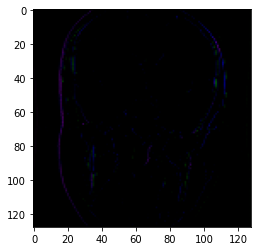

In [ ]:
plt.imshow(np.array(keras.layers.Conv1D(3,3,padding='same')(IMAGES[0].reshape(1,128,128,1))).reshape(128,128,3))

In [ ]:
import pickle

In [ ]:
os.makedirs('/content/drive/MyDrive/datasets/BRAIN_TUMOR_DATA_STORE')

In [ ]:
pickle.dump(x_train_images,open('/content/drive/MyDrive/datasets/BRAIN_TUMOR_DATA_STORE/train_images.pkl','wb'))
pickle.dump(x_test_images,open('/content/drive/MyDrive/datasets/BRAIN_TUMOR_DATA_STORE/test_images.pkl','wb'))

pickle.dump(X_TRAINING_LABELS,open('/content/drive/MyDrive/datasets/BRAIN_TUMOR_DATA_STORE/TRAINING_LABELS.pkl','wb'))
pickle.dump(X_TESTING_LABELS,open('/content/drive/MyDrive/datasets/BRAIN_TUMOR_DATA_STORE/TESTING_LABELS.pkl','wb'))

pickle.dump(x_train_masks,open('/content/drive/MyDrive/datasets/BRAIN_TUMOR_DATA_STORE/train_masks.pkl','wb'))
pickle.dump(x_test_masks,open('/content/drive/MyDrive/datasets/BRAIN_TUMOR_DATA_STORE/test_masks.pkl','wb'))

pickle.dump(x_train_borders,open('/content/drive/MyDrive/datasets/BRAIN_TUMOR_DATA_STORE/train_borders.pkl','wb'))
pickle.dump(x_test_borders,open('/content/drive/MyDrive/datasets/BRAIN_TUMOR_DATA_STORE/test_borders.pkl','wb'))